# Finding Zip Codes based on latitude and longitude

In this project we will determine the  zip codes based on the geocode( latitude and longitude).  We have  training set that has zip codes and their corresponding geo codes. We will determine the zip codes using clustering algorithms. The zip codes in this projects belong to SF city area. 

In [0]:
# Importing the training data

from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np

uploaded = files.upload()
zipcodeTrain =  pd.read_csv('TrainingData.csv')

Saving TrainingData.csv to TrainingData.csv


In [0]:
zipcodeTrain.head()

,latitude,longitude,address,zipcode
0,37.783970,-122.390156,"180 Brannan St, San Francisco, CA 94105, USA",94105
1,37.771100,-122.424606,"Market St & Laguna St, San Francisco, CA 94102...",94102
2,37.755795,-122.432384,"822 Noe St, San Francisco, CA 94114, USA",94114
3,37.780138,-122.480697,"5709 Geary Blvd, San Francisco, CA 94121, USA",94121
4,37.758378,-122.508305,"4407 Kirkham St, San Francisco, CA 94122, USA",94122


In [0]:
# Check for missing values in Zip Code

zipcodeTrain.loc[zipcodeTrain["zipcode"].isnull() == True]

# All zip codes are populated 

,latitude,longitude,address,zipcode


[[<matplotlib.axis.YTick at 0x7fbeb0992160>,
 (10, 2400)]

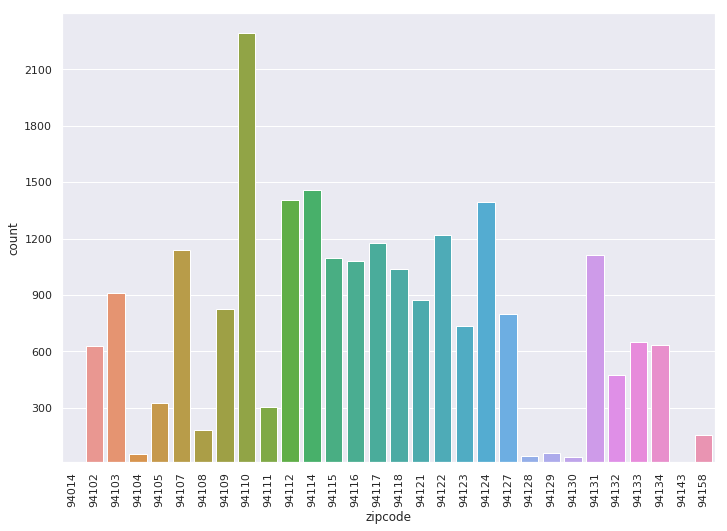

In [0]:
# bar chart on Zip Code Distribution

sns.set_style("whitegrid") 
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.countplot(x='zipcode', data=zipcodeTrain)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

g.set(ylim=(10,2400),yticks=np.arange(0,2400,300))


# **STEP 1:  Balance the Dataset**

The data on zip codes is not equally represented. Some of the zip codes have less than 100 data points.

**Q1. Should we exclude zip codes that do not have enough representation in our training data?**

**OR**

**Up- sample data that is under represented?.**

**Q2. Should balancing be done before OR after standardizing the variables.**

ANS : The data is balanced we do not need to balance it. Balancing is required only in causes like fraud detection etc

---




In [0]:
# Take sample of 900 for each. Up sampls  each class as needed. 

# Class count
zipcode_counts = zipcodeTrain.zipcode.value_counts()

zipcode_counts


94110    2295
94114    1456
94112    1404
94124    1397
94122    1217
94117    1178
94107    1140
94131    1113
94115    1098
94116    1081
94118    1037
94103     911
94121     876
94109     826
94127     798
94123     734
94133     648
94134     634
94102     631
94132     476
94105     325
94111     305
94108     181
94158     158
94129      59
94104      57
94128      42
94130      40
94143      10
94014       5
Name: zipcode, dtype: int64

In [0]:
#(2) Synthetic Minority Oversampling Technique (SMOTE)

#To avoid the over-fitting problem, Chawla et al. (2002) propose the Synthetic Minority Over-sampling Technique (SMOTE). This method is considered a state-of-art technique and works well in various applications. 
#This method generates synthetic data based on the feature space similarities between existing minority instances. In order to create a synthetic instance, it finds the K-nearest neighbors of each minority instance, 
#randomly selects one of them, and then calculate linear interpolations to produce a new minority instance in the neighborhood.


#We split this into two different datasets, one for the independent features — x, and one for the dependent variable — y (which is the last column). We’ll now split the dataset x into two separate sets — xTrain and xTest. 
#Similarly, we’ll split the dataset y into two sets as well — yTrain and yTest.

#from imblearn.over_sampling import SMOTE

#X = np.array(zipcodeTrain[['longitude','latitude']])
#y = np.array(zipcodeTrain['zipcode'])

#print('Shape of X: {}'.format(X.shape))
#print('Shape of y: {}'.format(y.shape))



In [0]:
#print("Before OverSampling, counts of label '94110': {}".format(sum(y==94110)))
#print("Before OverSampling, counts of label '94114': {} \n".format(sum(y==94114)))

#sm = SMOTE(random_state=2, k_neighbors=4)
#X_train_res, y_train_res = sm.fit_sample(X, y.ravel())

#print("After OverSampling, counts of label '94110': {}".format(sum(y_train_res==94110)))
#print("After OverSampling, counts of label '94114': {} \n".format(sum(y_train_res==94114)))


In [0]:
# After over sampling

#dataoversampled=pd.DataFrame(y_train_res)
#dataoversampled.columns = ['zipcode']

#g = sns.countplot(x='zipcode', data=dataoversampled)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

#g.set(ylim=(10,2400),yticks=np.arange(0,2400,300))


# STEP 2: Check the distribution of explanatory variables

**Should we check for distribution within each class or overall distribution?**


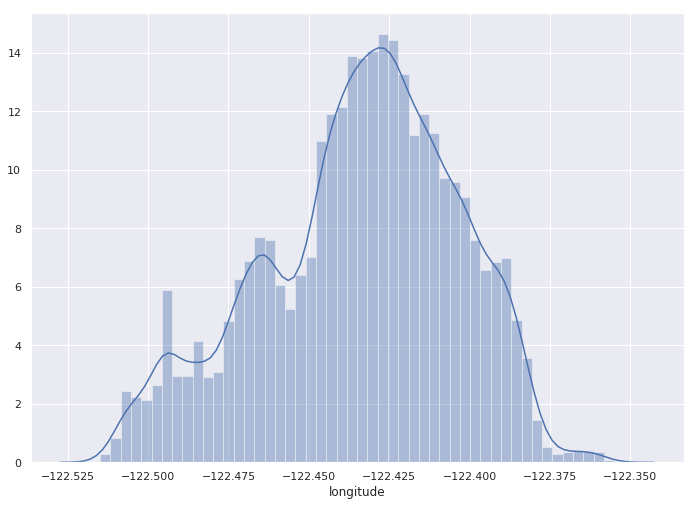

In [0]:
sns.distplot(zipcodeTrain['longitude'])



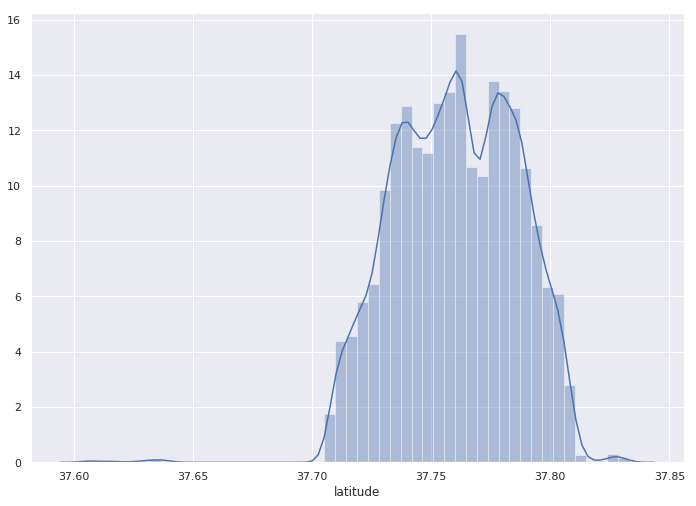

In [0]:
sns.distplot(zipcodeTrain['latitude'])


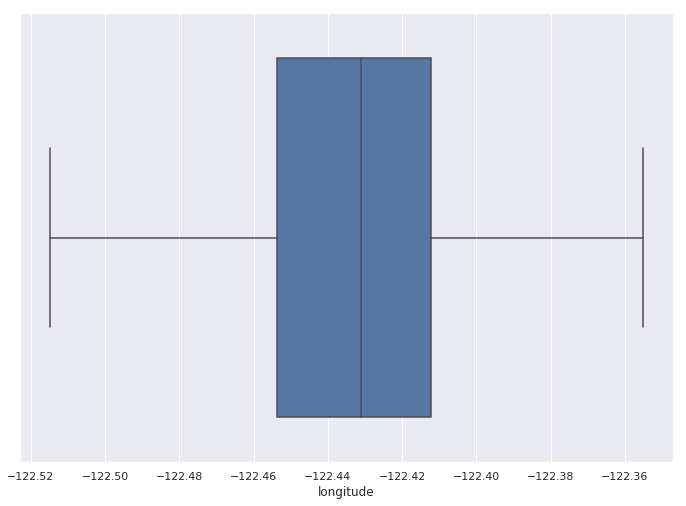

In [0]:
sns.boxplot(zipcodeTrain['longitude'])


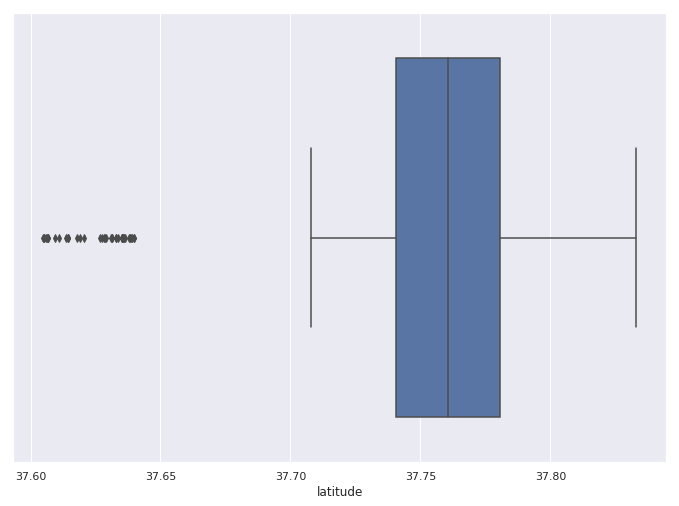

In [0]:
sns.boxplot(zipcodeTrain['latitude'])

**The Latitude has some outliers, what should we do with these? they may belong to a zip code**

In [0]:
#Zipcode with latitude less that 37.56

zipcodetrain_oulierlat = zipcodeTrain[zipcodeTrain['latitude'] < 37.65]
zipcodetrain_oulierlat.zipcode.value_counts()

# 94128 is san mateo county. which is a valid zipcode. Should we consider this as outlier?

94128    42
Name: zipcode, dtype: int64

# STEP 3 : Standardize the variables

z.reshape(-1,1) gives  array([[ 1],   [ 2],   [ 3],   [ 4],   [ 5],   [ 6],   [ 7],   [ 8],   [ 9],   [10],   [11],   [12]]). -1 denotes unknown number of rows and 1 denotes the 1st column.   The preprocessing module further provides a utility classes such as
 

*   **StandardScaler** : The standard scaler method converts the data into correspondincy Z score.It implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.
*   **MinMaxScaler** :  Transforms features by scaling each feature to a given range.This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

Since our data has outlier we shall use MinMaxScaler





In [0]:
# Standardize the Logitude and Latitude values in X_Train dataset

from sklearn.preprocessing import MinMaxScaler
import matplotlib  as plt

scaler = MinMaxScaler()

X_train = zipcodeTrain[['latitude','longitude']]
y_train = zipcodeTrain['zipcode']

X_train_transformed = scaler.fit_transform(np.array(X_train).reshape(-1,2))

X_train_transformed




array([[0.78486386, 0.78044156],
       [0.72849867, 0.56491642],
       [0.66146861, 0.51626023],
       ...,
       [0.83470208, 0.69885951],
       [0.82349545, 0.69447023],
       [0.72086313, 0.7845881 ]])

Check distribution after standardizing.


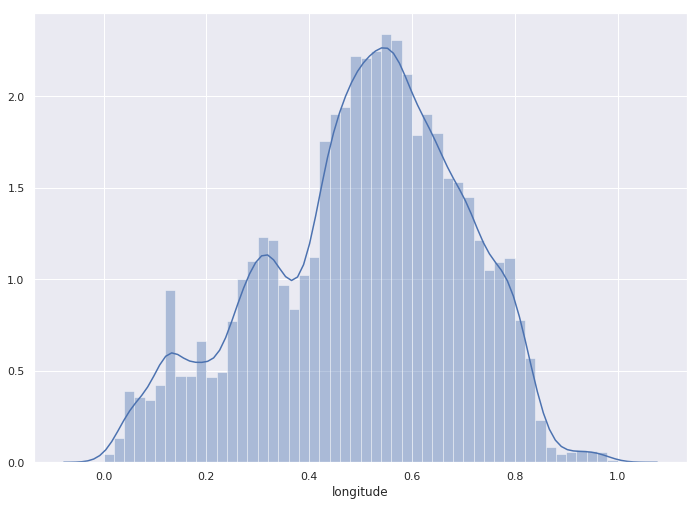

In [0]:
X_train_transformed_pd = pd.DataFrame(X_train_transformed)
X_train_transformed_pd.columns = ['latitude', 'longitude']

sns.distplot(X_train_transformed_pd['longitude'])

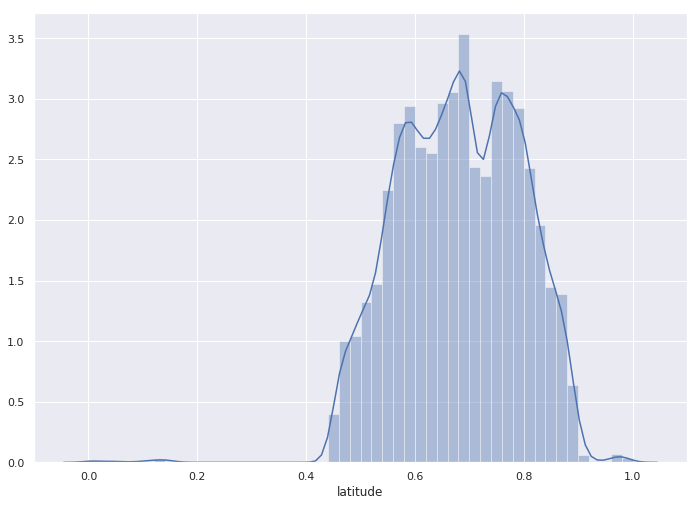

In [0]:
sns.distplot(X_train_transformed_pd['latitude'])

In [0]:

# Normalize using StandarScaler. We check the accuracy by standardizing 

from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

X_train_standard = stdscaler.fit_transform(np.array(X_train).reshape(-1,2))

X_train_standard



array([[ 0.92691606,  1.44509855],
       [ 0.42342549,  0.31486494],
       [-0.17533063,  0.05970742],
       ...,
       [ 1.37210347,  1.01727483],
       [ 1.2719986 ,  0.99425704],
       [ 0.35521989,  1.4668434 ]])

# Step 5 : Plot the latitude and longitude based on the zip codes as hues




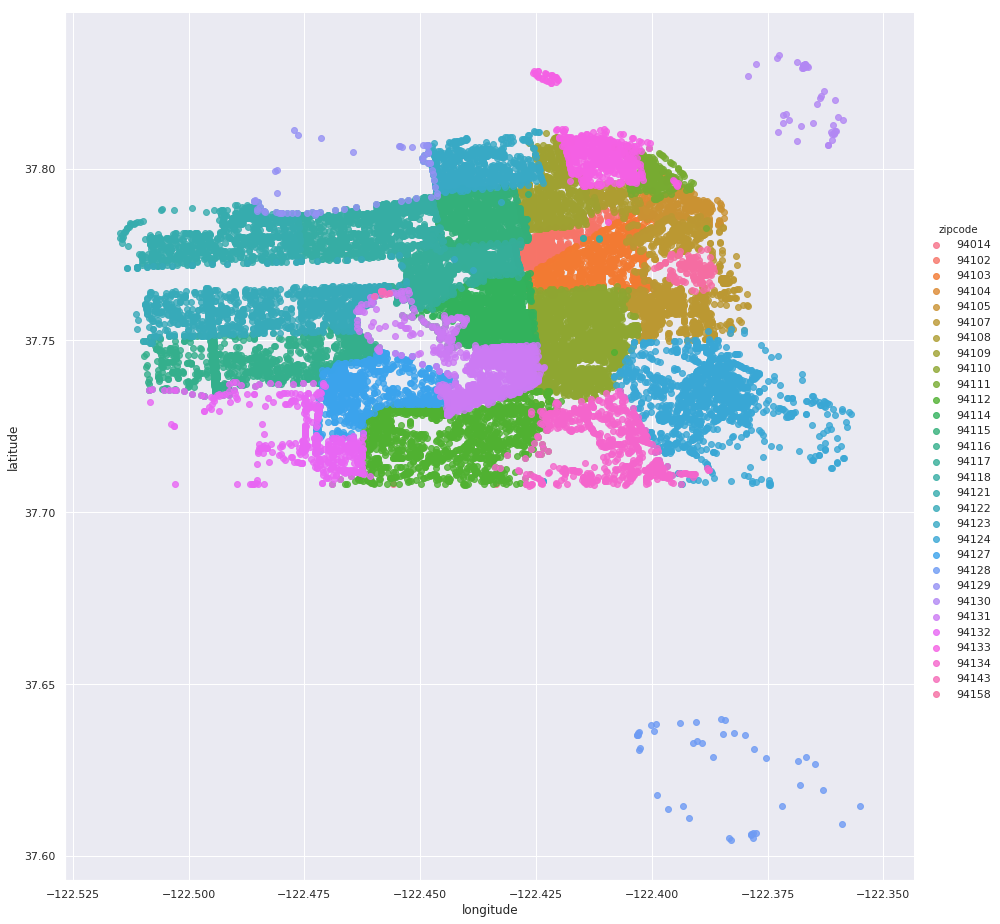

In [0]:
# Scatter plot in seaborn is lmplot
sns.set(rc={'figure.figsize':(13.7,12.27)})
g= sns.lmplot( y="latitude", x="longitude",data=zipcodeTrain, fit_reg=False, hue='zipcode', legend=True, height=13, aspect=1)
 
g

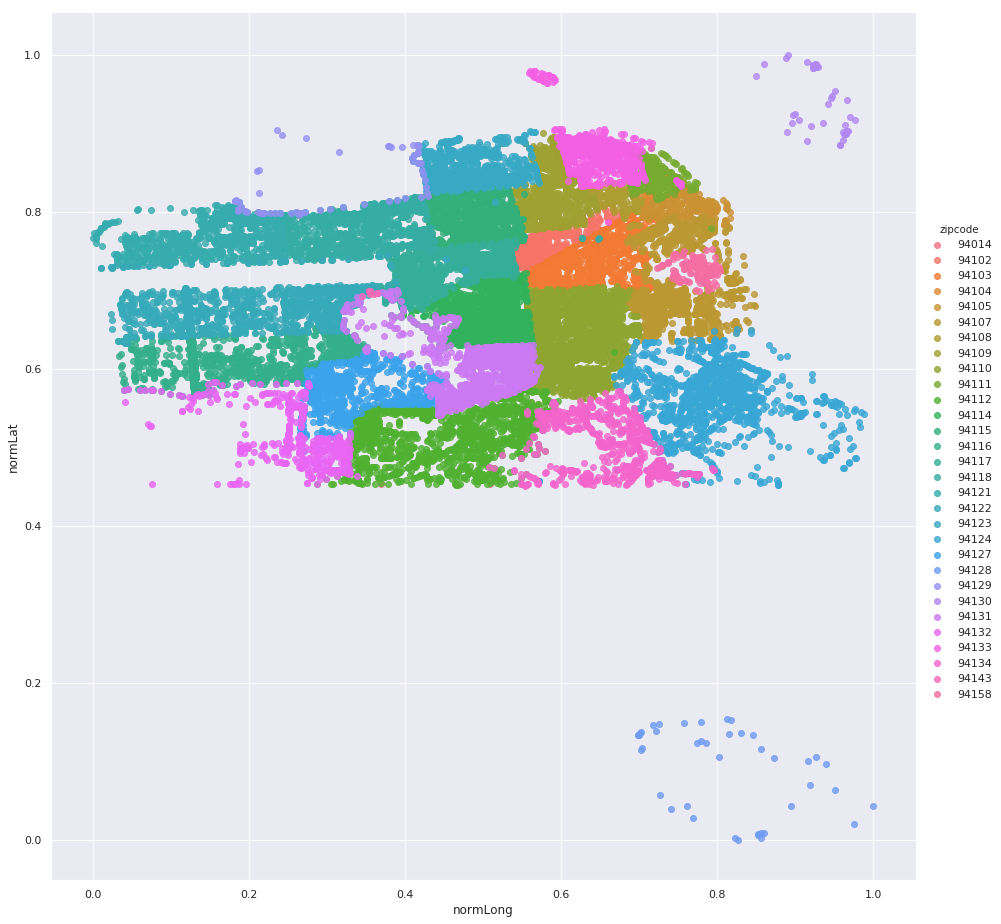

In [0]:
# Scatter plot on Standardized data.
zipcodeTrain['normLat'] = scaler.fit_transform(np.array(zipcodeTrain['latitude']).reshape(-1,1))
zipcodeTrain['normLong'] = scaler.fit_transform(np.array(zipcodeTrain['longitude']).reshape(-1,1))


sns.set(rc={'figure.figsize':(13.7,12.27)})
facet = sns.lmplot( y="normLat", x="normLong", data=zipcodeTrain, fit_reg=False, hue='zipcode', legend=True, height=13, aspect=1)
 


# Step 4:  Model Training

In [0]:
# Model on Min_Max Scaler
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_transformed, y_train)  



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Model on Standard scaler

from sklearn.neighbors import KNeighborsClassifier  
stdclassifier = KNeighborsClassifier(n_neighbors=5)  
stdclassifier.fit(X_train_standard, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Model without any standardadization or min max

from sklearn.neighbors import KNeighborsClassifier  
rawclassifier = KNeighborsClassifier(n_neighbors=5)  
rawclassifier.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Accuracy on Training Data

In [0]:
classifier.score(X_train_transformed, y_train)


0.9522410988613772

In [0]:
# Accuracy on Standardizing

stdclassifier.score(X_train_standard, y_train)


0.9529188505331646

In [0]:
# Accuracy without using any transformation on lat and long

rawclassifier.score(X_train, y_train)

0.9531899512018797

# **Step 5: Preparing Test Data**

In [0]:
# lets us predict for 4 test value


uploaded = files.upload()
zipcodeTest =  pd.read_csv('TestData2.csv')



Saving TestData1.csv to TestData1 (2).csv


In [0]:
# Create a dataset of zipcode, get Zipcodes for the data from google api

#Using  gmaps package to populate rest of the address details based on longitude and Latitude
#!pip3 install googlemaps

#import googlemaps as gm

#gmaps = gm.Client(key='*')

#def GetAddressInfoFromGoogelNew(data):
  #response = gmaps.reverse_geocode((data['latitude'],data['longitude']))[0]["formatted_address"]
  #print(response)
 # return response

#zipcodeTest['response'] = zipcodeTest.apply(GetAddressInfoFromGoogelNew, axis=1)

zipcodeTest.to_csv('TestData2.csv')
files.download('TestData2.csv')

In [0]:
zipcodeTest['ZIP'] = zipcodeTest.response.apply(lambda x: x.split(',')[-2].replace('CA','').strip())
zipcodeTest['ZIP'] = zipcodeTest.ZIP.astype(int)
zipcodeTest

,address,latitude,longitude,response,ZIP,normLat,normLong,stdLat,stdLong,predictedZipCode,PredictionCorrect,stdpredictedZipCode,stdPredictionCorrect,rawpredictedZipCode,rawPredictionCorrect
0,518 Oak St,37.774383,-122.428465,"518 Oak St, San Francisco, CA 94102, USA",94102,0.682294,0.650664,0.695617,0.261616,94103,False,94102,False,94102,False
1,1455 LAGUNA ST,37.784479,-122.427951,"1445 Laguna St, San Francisco, CA 94115, USA",94115,0.790448,0.654818,1.169009,0.279729,94102,False,94109,False,94115,False
2,828 Chenery St,37.734933,-122.436134,"828 Chenery St, San Francisco, CA 94131, USA",94131,0.259684,0.588659,-1.154148,-0.008753,94103,False,94112,False,94131,False
3,1357 Eddy St,37.781685,-122.429877,"1369 Eddy St, San Francisco, CA 94115, USA",94115,0.760515,0.639248,1.037991,0.211838,94102,False,94109,False,94115,False
4,4203 23rd St,37.752672,-122.436864,"4203 23rd St, San Francisco, CA 94114, USA",94114,0.449716,0.582756,-0.322376,-0.034495,94103,False,94114,False,94114,False
5,401 08th St,37.773484,-122.407944,"420 8th St, San Francisco, CA 94103, USA",94103,0.672656,0.816575,0.653434,0.985063,94103,False,94103,False,94103,False
6,610 Irving St,37.764209,-122.464475,"600 Irving St, San Francisco, CA 94122, USA",94122,0.573308,0.359529,0.218584,-1.007863,94102,False,94122,False,94122,False
7,36 Martha Ave,37.734095,-122.439787,"36 Martha Ave, San Francisco, CA 94131, USA",94131,0.250716,0.559128,-1.193403,-0.137522,94103,False,94112,False,94131,False
8,3339 Lawton St,37.756919,-122.498876,"3337 Lawton St, San Francisco, CA 94122, USA",94122,0.495206,0.081404,-0.123267,-2.220616,94117,False,94122,False,94122,False
9,3309 Anza St,37.778130,-122.483796,"3311 Anza St, San Francisco, CA 94121, USA",94121,0.722428,0.203323,0.871285,-1.688993,94115,False,94121,False,94121,False


In [0]:
zipcodeTest['normLat'] = scaler.fit_transform(np.array(zipcodeTest['latitude']).reshape(-1,1))
zipcodeTest['normLong'] = scaler.fit_transform(np.array(zipcodeTest['longitude']).reshape(-1,1))

zipcodeTest['stdLat'] = stdscaler.fit_transform(np.array(zipcodeTest['latitude']).reshape(-1,1))
zipcodeTest['stdLong'] = stdscaler.fit_transform(np.array(zipcodeTest['longitude']).reshape(-1,1))

zipcodeTestmodel1 = zipcodeTest[['normLat','normLong']]
zipcodeTestmodel2 = zipcodeTest[['stdLat','stdLong']]
zipcodeTestmodel3 = zipcodeTest[['latitude','longitude']]

zipcodeTest



,address,latitude,longitude,response,ZIP,normLat,normLong,stdLat,stdLong
0,518 Oak St,37.774383,-122.428465,"518 Oak St, San Francisco, CA 94102, USA",94102,0.682294,0.650664,0.695617,0.261616
1,1455 LAGUNA ST,37.784479,-122.427951,"1445 Laguna St, San Francisco, CA 94115, USA",94115,0.790448,0.654818,1.169009,0.279729
2,828 Chenery St,37.734933,-122.436134,"828 Chenery St, San Francisco, CA 94131, USA",94131,0.259684,0.588659,-1.154148,-0.008753
3,1357 Eddy St,37.781685,-122.429877,"1369 Eddy St, San Francisco, CA 94115, USA",94115,0.760515,0.639248,1.037991,0.211838
4,4203 23rd St,37.752672,-122.436864,"4203 23rd St, San Francisco, CA 94114, USA",94114,0.449716,0.582756,-0.322376,-0.034495
5,401 08th St,37.773484,-122.407944,"420 8th St, San Francisco, CA 94103, USA",94103,0.672656,0.816575,0.653434,0.985063
6,610 Irving St,37.764209,-122.464475,"600 Irving St, San Francisco, CA 94122, USA",94122,0.573308,0.359529,0.218584,-1.007863
7,36 Martha Ave,37.734095,-122.439787,"36 Martha Ave, San Francisco, CA 94131, USA",94131,0.250716,0.559128,-1.193403,-0.137522
8,3339 Lawton St,37.756919,-122.498876,"3337 Lawton St, San Francisco, CA 94122, USA",94122,0.495206,0.081404,-0.123267,-2.220616
9,3309 Anza St,37.778130,-122.483796,"3311 Anza St, San Francisco, CA 94121, USA",94121,0.722428,0.203323,0.871285,-1.688993


#Step 6:  Predict Zip Code for Test Data



In [0]:
zipcodeTest['predictedZipCode'] = classifier.predict(zipcodeTestmodel1)
zipcodeTest['PredictionCorrect'] = zipcodeTest['predictedZipCode'] == zipcodeTest['ZIP']

zipcodeTest['stdpredictedZipCode'] = stdclassifier.predict(zipcodeTestmodel2)
zipcodeTest['stdPredictionCorrect'] = zipcodeTest['stdpredictedZipCode'] == zipcodeTest['ZIP']

zipcodeTest['rawpredictedZipCode'] = rawclassifier.predict(zipcodeTestmodel3)
zipcodeTest['rawPredictionCorrect'] = zipcodeTest['rawpredictedZipCode'] == zipcodeTest['ZIP']

zipcodeTest

#k = 2, correct pred = 2
#k = 3, correct pred = 2
#k = 4, correct pred = 2
#k = 9, correct pred = 2
#k =12, correct pred = 2

,address,latitude,longitude,response,ZIP,normLat,normLong,stdLat,stdLong,predictedZipCode,PredictionCorrect,stdpredictedZipCode,stdPredictionCorrect,rawpredictedZipCode,rawPredictionCorrect
0,518 Oak St,37.774383,-122.428465,"518 Oak St, San Francisco, CA 94102, USA",94102,0.682294,0.650664,0.695617,0.261616,94103,False,94102,True,94102,True
1,1455 LAGUNA ST,37.784479,-122.427951,"1445 Laguna St, San Francisco, CA 94115, USA",94115,0.790448,0.654818,1.169009,0.279729,94102,False,94109,False,94115,True
2,828 Chenery St,37.734933,-122.436134,"828 Chenery St, San Francisco, CA 94131, USA",94131,0.259684,0.588659,-1.154148,-0.008753,94103,False,94112,False,94131,True
3,1357 Eddy St,37.781685,-122.429877,"1369 Eddy St, San Francisco, CA 94115, USA",94115,0.760515,0.639248,1.037991,0.211838,94102,False,94109,False,94115,True
4,4203 23rd St,37.752672,-122.436864,"4203 23rd St, San Francisco, CA 94114, USA",94114,0.449716,0.582756,-0.322376,-0.034495,94103,False,94114,True,94114,True
5,401 08th St,37.773484,-122.407944,"420 8th St, San Francisco, CA 94103, USA",94103,0.672656,0.816575,0.653434,0.985063,94103,True,94103,True,94103,True
6,610 Irving St,37.764209,-122.464475,"600 Irving St, San Francisco, CA 94122, USA",94122,0.573308,0.359529,0.218584,-1.007863,94102,False,94122,True,94122,True
7,36 Martha Ave,37.734095,-122.439787,"36 Martha Ave, San Francisco, CA 94131, USA",94131,0.250716,0.559128,-1.193403,-0.137522,94103,False,94112,False,94131,True
8,3339 Lawton St,37.756919,-122.498876,"3337 Lawton St, San Francisco, CA 94122, USA",94122,0.495206,0.081404,-0.123267,-2.220616,94117,False,94122,True,94122,True
9,3309 Anza St,37.778130,-122.483796,"3311 Anza St, San Francisco, CA 94121, USA",94121,0.722428,0.203323,0.871285,-1.688993,94115,False,94121,True,94121,True


In [0]:
# In the above table 
# PredictionCorrect = The predication is done on latitude and Longitude variables that are scaled on Min Max Scaler

# stdPredictionCorrect = The prediction is done on latitude and Longitude variables that are scaled on Standard Scaler

# rawPredictionCorrect = The prediction is done on latitude and longitude variables that are NOT scaled.
zipcodeTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
address                 48 non-null object
latitude                48 non-null float64
longitude               48 non-null float64
response                48 non-null object
ZIP                     48 non-null object
normLat                 48 non-null float64
normLong                48 non-null float64
stdLat                  48 non-null float64
stdLong                 48 non-null float64
predictedZipCode        48 non-null int64
PredictionCorrect       48 non-null bool
stdpredictedZipCode     48 non-null int64
stdPredictionCorrect    48 non-null bool
rawpredictedZipCode     48 non-null int64
rawPredictionCorrect    48 non-null bool
dtypes: bool(3), float64(6), int64(3), object(3)
memory usage: 4.7+ KB


# Step7: Calculate accuracy on unseen data.

In [0]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


print(confusion_matrix(zipcodeTest['ZIP'], zipcodeTest['rawpredictedZipCode']))
#print(classification_report(y_test, y_pred))  

print(accuracy_score(zipcodeTest['ZIP'], zipcodeTest['rawpredictedZipCode']))  


#Accuracy score without standardization or minmax scaling is 97.9%


[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
0.9791666666666666


In [0]:
print(confusion_matrix(zipcodeTest['ZIP'], zipcodeTest['stdpredictedZipCode']))
#print(classification_report(y_test, y_pred))  

print(accuracy_score(zipcodeTest['ZIP'], zipcodeTest['stdpredictedZipCode']))  

#Accuracy score standard scaler is 72.9%


[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
0.7291666666666666


In [0]:
print(confusion_matrix(zipcodeTest['ZIP'], zipcodeTest['predictedZipCode']))
#print(classification_report(y_test, y_pred))  

print(accuracy_score(zipcodeTest['ZIP'], zipcodeTest['predictedZipCode']))  

#Accuracy score with Min-Max scalre is 10.4%

[[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
0.10416666666666667
